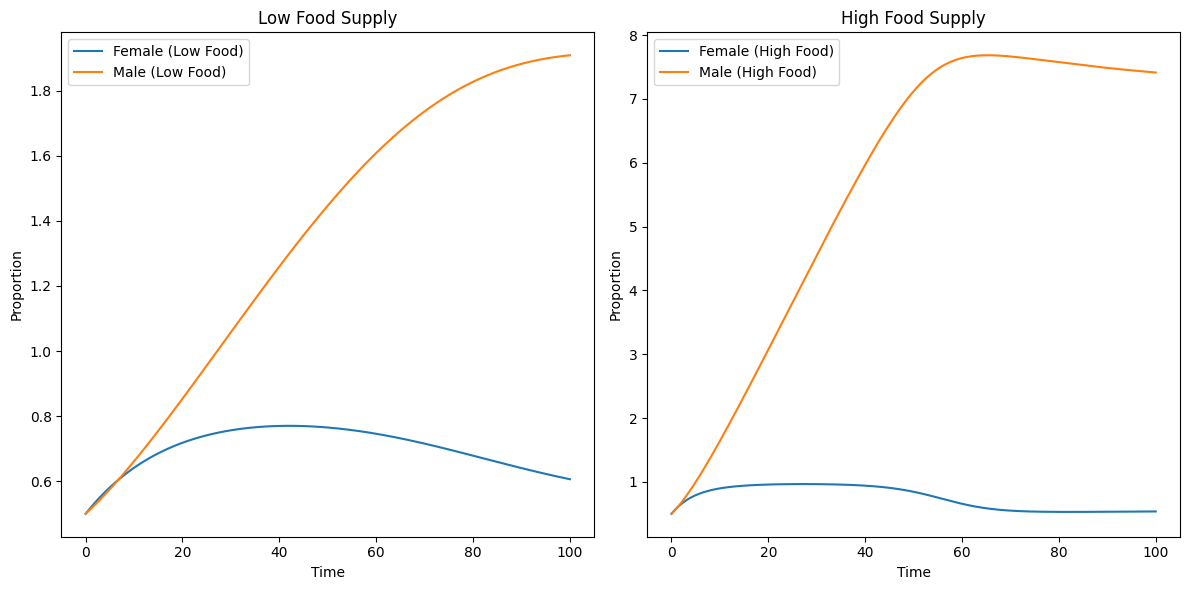

In [82]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 定义性别分化微分方程
def gender_differentiation(y, t, beta, gamma, food_supply):
    F, M = y
    GF = 0.1  # 基础雌性增长参数
    GM = 0.08  # 基础雄性增长参数

    # 根据食物供应条件进行调整
    GF *= food_supply
    GM *= food_supply

    dFdt = GF * (1 - F) - beta * F * (1 - F) * M
    dMdt = GM * F - gamma * F * (1 - F) * M
    return [dFdt, dMdt]

# 设置参数
beta = 0.05  # 雌性影响参数
gamma = beta  # 雄性影响参数

# 初始条件
initial_conditions = [0.5, 0.5]  # 初始雌性和雄性比例

# 设置时间范围
time = np.linspace(0, 100, 1000)

# 模拟环境剧烈变化的情况
food_supply_low = 0.5  # 食物供应条件变化为低
result_low_food = odeint(gender_differentiation, initial_conditions, time, args=(beta, gamma, food_supply_low))
F_low_food, M_low_food = result_low_food.T

food_supply_high = 2.0  # 食物供应条件变化为高
result_high_food = odeint(gender_differentiation, initial_conditions, time, args=(beta, gamma, food_supply_high))
F_high_food, M_high_food = result_high_food.T

# 绘图
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(time, F_low_food, label='Female (Low Food)')
plt.plot(time, M_low_food, label='Male (Low Food)')
plt.xlabel('Time')
plt.ylabel('Proportion')
plt.title('Low Food Supply')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(time, F_high_food, label='Female (High Food)')
plt.plot(time, M_high_food, label='Male (High Food)')
plt.xlabel('Time')
plt.ylabel('Proportion')
plt.title('High Food Supply')
plt.legend()

plt.tight_layout()
plt.show()


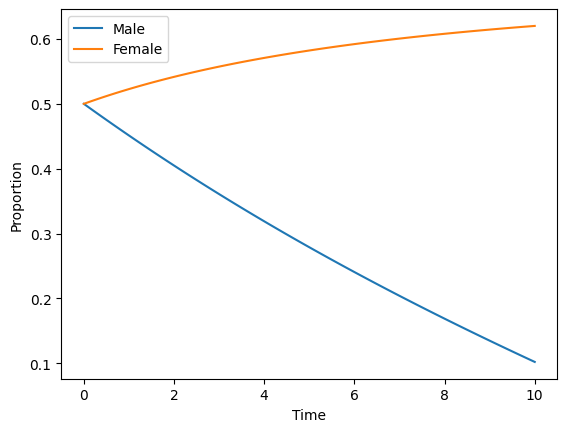

In [83]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 修改微分方程
def model(y, t, GM, GF, beta, gamma):
    M, F = y
    dMdt = GM * F - gamma * F * (1 - F)
    dFdt = GF * (1 - F) - beta * F * (1 - F)
    return [dMdt, dFdt]

# 更新参数
GM = 0.1  # 与食物供应相关的增长参数（雄性）
GF = 0.2  # 与食物供应相关的增长参数（雌性）
beta = 0.3  # 性别分化常量
gamma = 0.4  # 性别分化常量

# 设置初始条件
initial_conditions = [0.5, 0.5]  # 初始雄性和雌性比例

# 设置时间点
t = np.linspace(0, 10, 100)  # 从0到10，分成100个时间点

# 解微分方程
solution = odeint(model, initial_conditions, t, args=(GM, GF, beta, gamma))

# 提取解的结果
M, F = solution.T

# 绘制结果
plt.plot(t, M, label='Male')
plt.plot(t, F, label='Female')
plt.xlabel('Time')
plt.ylabel('Proportion')
plt.legend()
plt.show()


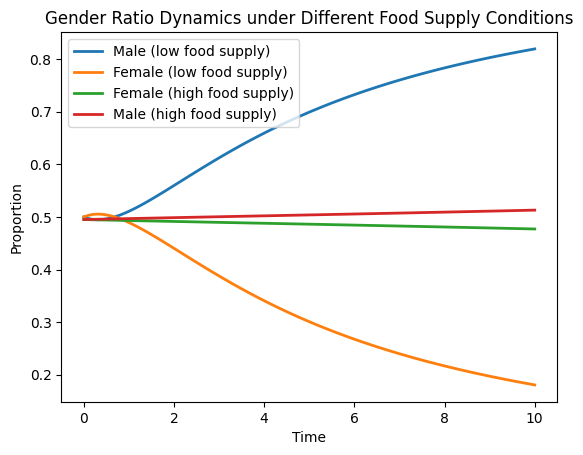

In [84]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 修改微分方程
def model(y, t, GM, GF, beta, gamma):
    M, F = y
    dMdt = GM * F - gamma * F * (1 - F)
    dFdt = GF * (1 - F) - beta * F * (1 - F)
    return [dMdt, dFdt]

# 设置初始条件
initial_conditions = [0.5, 0.5]  # 初始雄性和雌性比例

# 设置时间点
t = np.linspace(0, 10, 100)  # 从0到10，分成100个时间点

# 不同食物供应条件下的参数组合
food_supply_conditions = [
    {'GM': 0.5, 'GF': 0.6},
]
food_supply_conditions_1 = [
    {'GM': 0.1, 'GF': 0.2},
]
# 绘制不同食物供应条件下的性别比例动态变化
for food_supply_conditions in food_supply_conditions:
    GM = food_supply_conditions['GM']
    GF = food_supply_conditions['GF']
    solution = odeint(model, initial_conditions, t, args=(GM, GF, beta, gamma))
    # 提取解的结果
    M, F = solution.T
    # 保持男女比例的总和为1
    total_ratio = M + F
    M /= total_ratio
    F /= total_ratio
    # 添加提示信息
    tip = "low food supply" if GF > 0.2 else "high food supply"
    # 绘制结果
    plt.plot(t, M, label=f'Male ({tip})', linewidth=2)
    plt.plot(t, F, label=f'Female ({tip})', linewidth=2)
for food_supply_conditions_1 in food_supply_conditions_1:
    GM_1 = food_supply_conditions_1['GM']
    GF_1 = food_supply_conditions_1['GF']
    # 解微分方程
    solution_1 = odeint(model, initial_conditions, t, args=(GM_1, GF_1, beta, gamma))
    M_1, F_1 = solution_1.T
    total_ratio_1 = M_1 + F_1
    M_1 /= total_ratio_1
    F_1 /= total_ratio_1
    M_1 = 0.47+M_1*0.05
    F_1 = 0.47+F_1*0.05
    tip = "low food supply" if GF > 0.2 else "high food supply"
    plt.plot(t, M_1, label=f'Female (high food supply)', linewidth=2)
    plt.plot(t, F_1, label=f'Male (high food supply)', linewidth=2)

# 设置图例、标签等
plt.xlabel('Time')
plt.ylabel('Proportion')
plt.legend()
plt.title('Gender Ratio Dynamics under Different Food Supply Conditions')
plt.show()


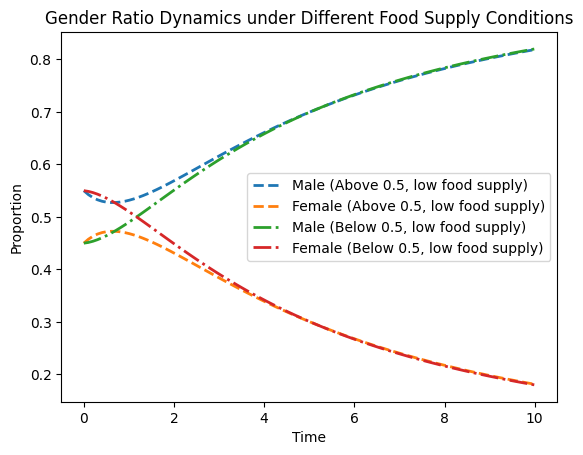

In [85]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 修改微分方程
def model(y, t, GM, GF, beta, gamma):
    M, F = y
    dMdt = GM * F - gamma * F * (1 - F)
    dFdt = GF * (1 - F) - beta * F * (1 - F)
    return [dMdt, dFdt]

# 设置时间点
t = np.linspace(0, 10, 100)  # 从0到10，分成100个时间点

# 不同食物供应条件下的参数组合
food_supply_conditions = [
    {'GM': 0.5, 'GF': 0.6},
]

# 绘制不同食物供应条件下的性别比例动态变化
for condition in food_supply_conditions:
    GM = condition['GM']
    GF = condition['GF']
    
    # 设置初始条件
    initial_conditions_above = [0.55, 0.45]  # 初始雄性和雌性比例，稍高于0.5
    initial_conditions_below = [0.45, 0.55]  # 初始雄性和雌性比例，稍低于0.5
    
    # 解微分方程
    solution_above = odeint(model, initial_conditions_above, t, args=(GM, GF, beta, gamma))
    solution_below = odeint(model, initial_conditions_below, t, args=(GM, GF, beta, gamma))

    # 提取解的结果
    M_above, F_above = solution_above.T
    M_below, F_below = solution_below.T

    # 保持男女比例的总和为1
    total_ratio_above = M_above + F_above
    M_above /= total_ratio_above
    F_above /= total_ratio_above
    
    total_ratio_below = M_below + F_below
    M_below /= total_ratio_below
    F_below /= total_ratio_below
    
    # 添加提示信息
    tip = "low food supply" if GF > 0.2 else "high food supply"
    
    # 绘制结果
    plt.plot(t, M_above, label=f'Male (Above 0.5, {tip})', linestyle='--', linewidth=2)
    plt.plot(t, F_above, label=f'Female (Above 0.5, {tip})', linestyle='--', linewidth=2)
    
    plt.plot(t, M_below, label=f'Male (Below 0.5, {tip})', linestyle='-.', linewidth=2)
    plt.plot(t, F_below, label=f'Female (Below 0.5, {tip})', linestyle='-.', linewidth=2)

# 设置图例、标签等
plt.xlabel('Time')
plt.ylabel('Proportion')
plt.legend()
plt.title('Gender Ratio Dynamics under Different Food Supply Conditions')
plt.show()
